In [1]:
import numpy as np
import scipy.stats as scistats
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def f_strength(strength, mean, std):
    return scistats.norm.pdf(strength, mean, std) # Probability density value of strength

def F_s_load(strength, mean, std):
    return scistats.norm.cdf(strength, mean, std) # Probability that load will cause a failure

# def equivalent_load(n, mean, std):
#     return np.max(scistats.norm.rvs(mean, std, n))

def fF(strength, n, mean_strength, std_strength, mean_load, std_load):
    return f_strength(strength, mean_strength, std_strength) * F_s_load(strength, mean_load, std_load)**(n)

def R_n(n,  mean_strength, std_strength, mean_load, std_load):
    integral, answer = integrate.quad(fF, 0, mean_strength + 5 * std_strength, args=(n, mean_strength, std_strength, mean_load, std_load)) # vary strength
    return integral

def h_n(n, mean_strength, std_strength, mean_load, std_load):
    return 1 - R_n(n+1, mean_strength, std_strength, mean_load, std_load)/R_n(n, mean_strength, std_strength, mean_load, std_load)



mu_strength = 600*10**6 # Pa = 600 MPa
std_strength = 60*10**6 # Pa = 50 MPa
mu_load = 400*10**6 # Pa = 400 MPa
std_load = 40*10**6 # Pa = 40 MPa

n_vals = np.linspace(0,8000,100)

R_n_vals = []
h_n_vals = []
for n in n_vals:
    R_n_vals.append(R_n(n, mu_strength, std_strength, mu_load, std_load))
    h_n_vals.append(h_n(n, mu_strength, std_strength, mu_load, std_load))







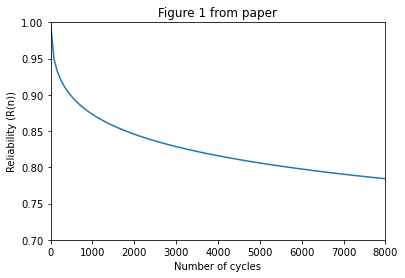

In [3]:
plt.figure()
plt.plot(n_vals, R_n_vals)
plt.title('Figure 1 from paper')
plt.xlabel('Number of cycles')
plt.ylabel('Reliability (R(n))')
plt.ylim(0.7, 1)
# remove gap between axis and plot
plt.margins(0)

([<matplotlib.axis.YTick at 0x2762f36b1f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

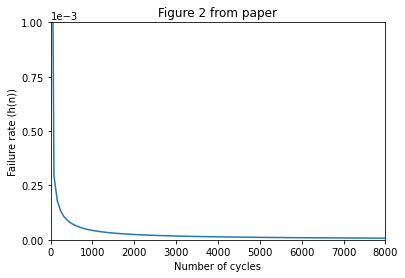

In [4]:
plt.figure()
plt.plot(n_vals, h_n_vals)
plt.title('Figure 2 from paper')
plt.xlabel('Number of cycles')
plt.ylabel('Failure rate (h(n))')
plt.ylim(0, 1e-3)
# remove gap between axis and plot
plt.margins(0)
# instead of decimals on y-axis, use scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# y-axis intervals of 0.25e-3
plt.yticks(np.arange(0, 1.25e-3, 0.25e-3))


In [5]:
def strength_degradation(n, strength_original, mean_load, N, c): # this needs to be calculated iteratively based on n
    delta_new = []
    for i in range(1,n+1):
        delta_new.append(strength_original - (strength_original-mean_load)*((i-1)/N)**c)
    return delta_new

def f_strength(strength, mean, std): # Probability density value of strength
    return scistats.norm.pdf(strength, mean, std)

def F_s_load(load, mean, std): # Probability that load will cause a failure
    return scistats.norm.cdf(load, mean, std)



def fmultF(strength, n, mean_strength, std_strength, mean_load, std_load, N, c):
    strength_vals_n = strength_degradation(n, strength, mean_load, N, c)
    F_s_list = F_s_load(strength_vals_n, mean_load, std_load) # A list of %s
    F_mult = np.prod(F_s_list) # Product taken as per paper
    return f_strength(strength, mean_strength, std_strength) * F_mult


def fmult1multF(strength, n, mean_strength, std_strength, mean_load, std_load, N, c):
    strength_vals_n = strength_degradation(n, strength, mean_load, N, c)
    F_s_list = F_s_load(strength_vals_n, mean_load, std_load) # A list of %s
    F_mult = np.prod(F_s_list) # Product taken as per paper
    return f_strength(strength, mean_strength, std_strength)* (1-F_s_list[-1]) * F_mult


def R_n_new(n,  mean_strength, std_strength, mean_load, std_load, N, c):
    integral, answer = integrate.quad(fmultF, 0, mean_strength + 5 * std_strength, args=(n, mean_strength, std_strength, mean_load, std_load, N, c))
    return integral

def h_n_new(n,  mean_strength, std_strength, mean_load, std_load, N, c):
    integral_top, answer = integrate.quad(fmult1multF, 0, mean_strength + 5 * std_strength, args=(n, mean_strength, std_strength, mean_load, std_load, N, c))
    bot_int = R_n_new(n, mean_strength, std_strength, mean_load, std_load, N, c)

    return integral_top/bot_int



mu_strength = 600*10**6 # Pa = 600 MPa
std_strength = 60*10**6 # Pa = 50 MPa
mu_load = 400*10**6 # Pa = 400 MPa
std_load = 40*10**6 # Pa = 40 MPa

N = 15000
c = 1.5

n_vals = np.arange(1,8000,100)

R_n_vals = []
h_n_vals = []
for n in n_vals:
    R_n_vals.append(R_n_new(n, mu_strength, std_strength, mu_load, std_load, N, c))
    h_n_vals.append(h_n_new(n, mu_strength, std_strength, mu_load, std_load, N, c))



In [ ]:
plt.figure()
plt.plot(n_vals, R_n_vals)
plt.title('Figure 3 from paper')
plt.xlabel('Number of cycles')
plt.ylabel('Reliability (R(n))')
plt.ylim(0.4, 1)
# remove gap between axis and plot
plt.margins(0)

In [ ]:
plt.figure()
plt.plot(n_vals, h_n_vals)
plt.title('Figure 4 from paper')
plt.xlabel('Number of cycles')
plt.ylabel('Failure rate (h(n))')
plt.ylim(0, 1e-3)
# remove gap between axis and plot
plt.margins(0)
# instead of decimals on y-axis, use scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# y-axis intervals of 0.25e-3
plt.yticks(np.arange(0, 1.25e-3, 0.25e-3))